In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('mv_dpd-2022-1121.csv')

C:\Users\Pon kebha.DESKTOP-PI8M9QL\AppData\Local\Temp\ipykernel_3960\3815989360.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('mv_dpd-2022-1121.csv')


In [3]:
df.head()

,lead_id,user_id,appops_status_code,customer_profile_id,p_customer_type,p_credit_score,employment,annual_turnover,income,annualturnover,final_annual_turnover,no_30plus_dpd_active,no_90plus_dpd_active_closed,wof_3yrs,set_3yrs
0,81772656,26309292,990,170954234,1,750,NaN,NaN,60000,NaN,NaN,0,0,0,0
1,81772769,24636740,990,170598024,1,700,NaN,100000.0,80000,NaN,100000,0,0,0,0
2,81773082,26309468,380,170324890,1,725,NaN,NaN,30000,NaN,NaN,0,0,0,0
3,81773840,26309802,380,170324968,1,775,Salaried,NaN,10500,NaN,NaN,0,0,0,0
4,81773927,22466894,380,171174168,1,750,NaN,NaN,60000,NaN,NaN,0,0,0,0


In [4]:
df.nunique()

lead_id                        76782
user_id                        76610
appops_status_code                 2
customer_profile_id            76610
p_customer_type                    3
p_credit_score                    18
employment                        12
annual_turnover                  573
income                          2925
annualturnover                   546
final_annual_turnover            727
no_30plus_dpd_active               2
no_90plus_dpd_active_closed        2
wof_3yrs                           2
set_3yrs                           2
dtype: int64

In [5]:
df_990=df[df['appops_status_code']==990]

In [6]:
df_380=df[df['appops_status_code']==380]

In [7]:
df_990.info(),df_380.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 72798
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_id                      4995 non-null   int64  
 1   user_id                      4995 non-null   int64  
 2   appops_status_code           4995 non-null   int64  
 3   customer_profile_id          4995 non-null   int64  
 4   p_customer_type              4995 non-null   int64  
 5   p_credit_score               4995 non-null   int64  
 6   employment                   3182 non-null   object 
 7   annual_turnover              1121 non-null   float64
 8   income                       4847 non-null   object 
 9   annualturnover               659 non-null    object 
 10  final_annual_turnover        1202 non-null   object 
 11  no_30plus_dpd_active         4995 non-null   int64  
 12  no_90plus_dpd_active_closed  4995 non-null   int64  
 13  wof_3yrs         

(None, None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76782 entries, 0 to 76781
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_id                      76782 non-null  int64  
 1   user_id                      76782 non-null  int64  
 2   appops_status_code           76782 non-null  int64  
 3   customer_profile_id          76782 non-null  int64  
 4   p_customer_type              76782 non-null  int64  
 5   p_credit_score               76782 non-null  int64  
 6   employment                   44165 non-null  object 
 7   annual_turnover              12870 non-null  float64
 8   income                       75267 non-null  object 
 9   annualturnover               9365 non-null   object 
 10  final_annual_turnover        13838 non-null  object 
 11  no_30plus_dpd_active         76782 non-null  int64  
 12  no_90plus_dpd_active_closed  76782 non-null  int64  
 13  wof_3yrs        

In [9]:
df.columns

Index(['lead_id', 'user_id', 'appops_status_code', 'customer_profile_id',
       'p_customer_type', 'p_credit_score', 'employment', 'annual_turnover',
       'income', 'annualturnover', 'final_annual_turnover',
       'no_30plus_dpd_active', 'no_90plus_dpd_active_closed', 'wof_3yrs',
       'set_3yrs'],
      dtype='object')

In [10]:
# df[df['income']=='415000p.a/12']
delete_row=df[df['income'].isin(['à¤°à¤¾à¤¶à¤¿60000','415000p.a/12'])].index
delete_row_1=df[df['final_annual_turnover'].isin(['à¥¨à¥¦à¥¦à¥¦à¥¦','à¥¨à¥¦à¥¦à¥¦à¥¦à¥¦'])].index
#-----------------------------------------------------------------------------------------------------------------
df.drop(delete_row,inplace=True)
df.drop(delete_row_1,inplace=True)
#------------------------------------------------------------------------------------------------------------------
df['income']=df['income'].apply(pd.to_numeric)
df['final_annual_turnover']=df['final_annual_turnover'].apply(pd.to_numeric)
#---------------------------------------------------------------------------------------------------------------------
df['p_customer_type']=df['p_customer_type'].replace({1 : 'Green', 2 : 'Red', 3 : 'Amber'})
#--------------------------------------------------------------------------------------------------------------------
df_380=df[df['appops_status_code']==380]
df_990=df[df['appops_status_code']==990]
#----------------------------------------------------------------------------------------------------------------------
df_990.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 72798
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_id                      4994 non-null   int64  
 1   user_id                      4994 non-null   int64  
 2   appops_status_code           4994 non-null   int64  
 3   customer_profile_id          4994 non-null   int64  
 4   p_customer_type              4994 non-null   object 
 5   p_credit_score               4994 non-null   int64  
 6   employment                   3181 non-null   object 
 7   annual_turnover              1121 non-null   float64
 8   income                       4846 non-null   float64
 9   annualturnover               658 non-null    object 
 10  final_annual_turnover        1201 non-null   float64
 11  no_30plus_dpd_active         4994 non-null   int64  
 12  no_90plus_dpd_active_closed  4994 non-null   int64  
 13  wof_3yrs         

In [11]:
df_990_mean=df_990.groupby(['p_customer_type','p_credit_score','no_30plus_dpd_active','no_90plus_dpd_active_closed','wof_3yrs','set_3yrs'],as_index=False).income.mean()
df_380_mean=df_380.groupby(['p_customer_type','p_credit_score','no_30plus_dpd_active','no_90plus_dpd_active_closed','wof_3yrs','set_3yrs'],as_index=False).income.mean()

In [12]:
df_380_mean

,p_customer_type,p_credit_score,no_30plus_dpd_active,no_90plus_dpd_active_closed,wof_3yrs,set_3yrs,income
0,Amber,0,0,0,0,0,5.239407e+04
1,Green,525,0,0,0,0,6.500000e+04
2,Green,550,0,0,0,0,1.072778e+05
3,Green,575,0,0,0,0,7.448438e+04
4,Green,600,0,0,0,0,6.164038e+04
5,Green,625,0,0,0,0,6.119827e+04
6,Green,650,0,0,0,0,3.017374e+06
7,Green,650,0,1,0,0,5.180727e+04
8,Green,650,0,1,1,0,5.425000e+04
9,Green,650,1,0,0,0,4.000000e+04


In [13]:
bins = [550,600,625,650,675,700,750,800]
labels = ['>=550 & <=600','>600 & <=650', '> 650 & <=700', '> 700 & <=750','>= 750 & <800']
df_990['credit_bins'] = pd.cut(df_990.p_credit_score, bins=bins, labels=labels,  right=False, include_lowest=False)
# df['bins'].value_counts()
df_990

C:\Users\Pon kebha.DESKTOP-PI8M9QL\AppData\Local\Temp\ipykernel_3960\3298066188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_990['credit_bins'] = pd.cut(df_990.p_credit_score, bins=bins, labels=labels,  right=False, include_lowest=False)


,lead_id,user_id,appops_status_code,customer_profile_id,p_customer_type,p_credit_score,employment,annual_turnover,income,annualturnover,final_annual_turnover,no_30plus_dpd_active,no_90plus_dpd_active_closed,wof_3yrs,set_3yrs,credit_bins
0,81772656,26309292,990,170954234,Green,750,NaN,NaN,60000.0,NaN,NaN,0,0,0,0,>= 750 & <800
1,81772769,24636740,990,170598024,Green,700,NaN,100000.0,80000.0,NaN,100000.0,0,0,0,0,> 700 & <=750
9,74638469,22103480,990,169391299,Green,725,NaN,NaN,25000.0,NaN,NaN,0,0,0,0,> 700 & <=750
18,81782019,26312795,990,171119430,Green,725,NaN,900000.0,50000.0,NaN,900000.0,0,0,0,0,> 700 & <=750
19,81663898,26154834,990,170438899,Green,725,Self Employed,NaN,30000.0,NaN,NaN,0,0,0,0,> 700 & <=750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72218,85351360,22582078,990,170306125,Green,750,NaN,NaN,60000.0,NaN,NaN,0,0,0,0,>= 750 & <800
72329,86997849,23212352,990,171139973,Green,775,NaN,200000.0,450000.0,200000.0,200000.0,0,0,0,0,>= 750 & <800
72511,86540123,27669866,990,170904407,Green,750,Self Employed,4800000.0,48000.0,4800000.0,4800000.0,0,0,0,0,>= 750 & <800
72518,86886168,27609640,990,170938601,Green,775,Self Employed,NaN,500000.0,NaN,NaN,0,0,0,0,>= 750 & <800


In [36]:
df['p_customer_type'].value_counts()

Green    75142
Red       1319
Amber      316
Name: p_customer_type, dtype: int64

In [14]:
df_990['credit_bins'].value_counts()

> 700 & <=750    2270
>= 750 & <800    2184
> 650 & <=700     508
>600 & <=650        8
>=550 & <=600       3
Name: credit_bins, dtype: int64

In [15]:
bins = [0,15000,20000,25000,35000,45000,99999999999999999999]
labels = ['>=0 & <=15000','>15000 & <=20000','>20000 & <=25000', '> 25000 & <=35000', '> 35000 & <=450000','>= 450000']
df_990['income_bins'] = pd.cut(df_990.income, bins=bins, labels=labels,  right=False, include_lowest=False)

C:\Users\Pon kebha.DESKTOP-PI8M9QL\AppData\Local\Temp\ipykernel_3960\3067630740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_990['income_bins'] = pd.cut(df_990.income, bins=bins, labels=labels,  right=False, include_lowest=False)


In [16]:
df_990['income_bins'].value_counts()

>= 450000             1727
> 25000 & <=35000     1148
> 35000 & <=450000     693
>20000 & <=25000       577
>15000 & <=20000       428
>=0 & <=15000           39
Name: income_bins, dtype: int64

In [17]:
bins = [550,600,650,700,750,800]
labels = ['>=550 & <=600','>600 & <=650', '> 650 & <=700', '> 700 & <=750','>= 750 & <800']
df_380['credit_bins'] = pd.cut(df_380.p_credit_score, bins=bins, labels=labels,  right=False, include_lowest=False)
# df['bins'].value_counts()
df_380

C:\Users\Pon kebha.DESKTOP-PI8M9QL\AppData\Local\Temp\ipykernel_3960\2098141492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_380['credit_bins'] = pd.cut(df_380.p_credit_score, bins=bins, labels=labels,  right=False, include_lowest=False)


,lead_id,user_id,appops_status_code,customer_profile_id,p_customer_type,p_credit_score,employment,annual_turnover,income,annualturnover,final_annual_turnover,no_30plus_dpd_active,no_90plus_dpd_active_closed,wof_3yrs,set_3yrs,credit_bins
2,81773082,26309468,380,170324890,Green,725,NaN,NaN,30000.0,NaN,NaN,0,0,0,0,> 700 & <=750
3,81773840,26309802,380,170324968,Green,775,Salaried,NaN,10500.0,NaN,NaN,0,0,0,0,>= 750 & <800
4,81773927,22466894,380,171174168,Green,750,NaN,NaN,60000.0,NaN,NaN,0,0,0,0,>= 750 & <800
5,81773999,26258812,380,167502978,Green,775,Salaried,20000.0,20000.0,NaN,20000.0,0,0,0,0,>= 750 & <800
6,26854531,12032587,380,168583988,Green,700,Salaried,300000.0,12000.0,300000,300000.0,0,0,0,0,> 700 & <=750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76777,87159342,2625549,380,171218203,Green,725,Self employed professional,2500000.0,55000.0,NaN,2500000.0,0,0,0,0,> 700 & <=750
76778,87159663,27850230,380,171218620,Green,775,NaN,NaN,40000.0,NaN,NaN,0,0,0,0,>= 750 & <800
76779,86349514,25839651,380,170797207,Green,725,NaN,NaN,22000.0,NaN,NaN,0,0,0,0,> 700 & <=750
76780,33566500,14152769,380,171183799,Green,650,Salaried,NaN,NaN,NaN,NaN,0,0,0,0,> 650 & <=700


In [18]:
df_380['credit_bins'].value_counts()

>= 750 & <800    34301
> 700 & <=750    27778
> 650 & <=700     8079
>=550 & <=600      282
>600 & <=650       237
Name: credit_bins, dtype: int64

In [19]:
bins = [0,15000,20000,25000,35000,45000,99999999999999999999]
labels = ['>=0 & <=15000','>15000 & <=20000','>20000 & <=25000', '> 25000 & <=35000', '> 35000 & <=450000','>= 450000']
df_380['income_bins'] = pd.cut(df_380.income, bins=bins, labels=labels,  right=False, include_lowest=False)

C:\Users\Pon kebha.DESKTOP-PI8M9QL\AppData\Local\Temp\ipykernel_3960\3887127090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_380['income_bins'] = pd.cut(df_380.income, bins=bins, labels=labels,  right=False, include_lowest=False)


In [20]:
df_380['income_bins'].value_counts()

> 25000 & <=35000     17480
>= 450000             16773
>15000 & <=20000      12789
>20000 & <=25000      11011
> 35000 & <=450000     7114
>=0 & <=15000          2890
Name: income_bins, dtype: int64

In [21]:
df_380.to_csv('df_380.csv')

In [22]:
df_990.to_csv('df_990.csv')

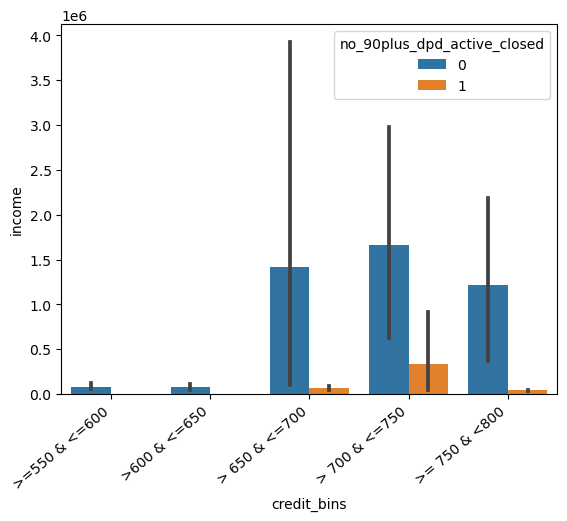

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.stripplot(y = df_380['no_90plus_dpd_active_closed'], x = df_380['credit_bins'])
data_380_plot=sns.barplot(data=df_380, x="credit_bins", y="income", hue="no_90plus_dpd_active_closed")
data_380_plot.set_xticklabels(data_380_plot.get_xticklabels(), rotation=40, ha="right")
# plt.figure(figsize=(8,4))
plt.savefig('data_380_plot.png', pad_inches=1)

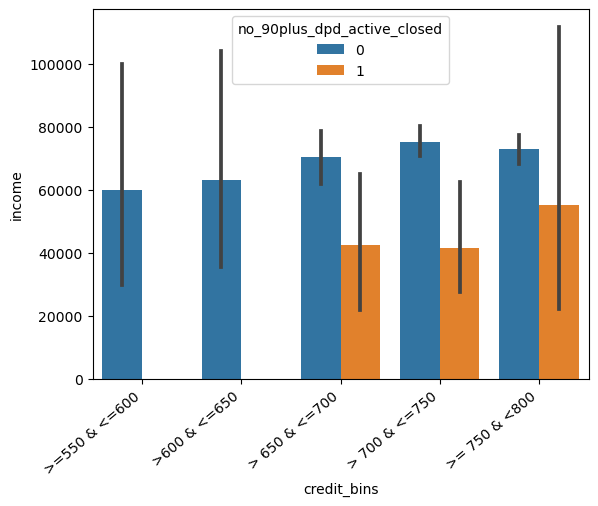

In [35]:
data_990_plot=sns.barplot(data=df_990, x="credit_bins", y="income", hue="no_90plus_dpd_active_closed")
data_990_plot.set_xticklabels(data_990_plot.get_xticklabels(), rotation=40, ha="right")
plt.savefig('data_990_plot.png', pad_inches=1)

In [ ]:
sns.displot(data=df_380, x="income", hue="credit_bins", stat="probability")

<AxesSubplot:xlabel='income_bins', ylabel='p_credit_score'>

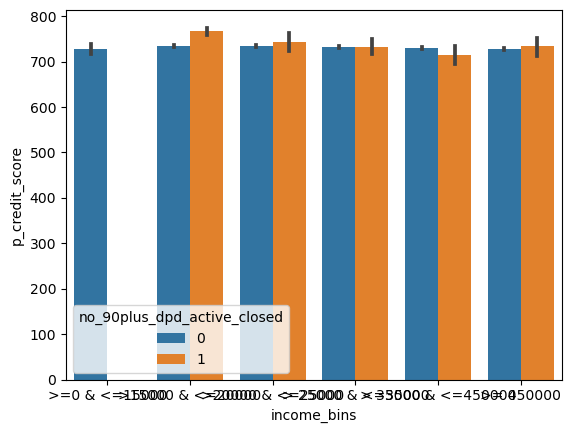

In [134]:
sns.barplot(data=df_990, x="income", y="p_credit_score", hue="no_90plus_dpd_active_closed")

In [ ]:
######

In [45]:
#import
df= pd.read_csv('mv_latest_login-2022-1121.csv')

C:\Users\Pon kebha.DESKTOP-PI8M9QL\AppData\Local\Temp\ipykernel_3960\2597938878.py:2: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('mv_latest_login-2022-1121.csv')


In [46]:
df['employment'].unique()

array([nan, 'Salaried', 'Self Employed', 'Self employed',
       'Self employed professional', 'Self employed business',
       'Salaried Doctor', 'salaried', 'Working Executive',
       'selfEmployedBusiness', 'Student', 'Self-Employed', 'selfemployee'],
      dtype=object)

In [47]:
df['employment']=df['employment'].replace({ 'Self Employed': 'Self',
                                           'Self employed': 'Self',
                                           'Self employed professional': 'Self',
                                           'Self employed business': 'Self',
                                           'selfEmployedBusiness': 'Self',
                                           'Self-Employed': 'Self',
                                           'selfemployee': 'Self',
                                           'Salaried' : 'Salaried',
                                           'Salaried Doctor' : 'Salaried',
                                           'salaried' : 'Salaried',
                                           'Working Executive' : 'Salaried'})

In [49]:
# df[df['income']=='415000p.a/12']
delete_row=df[df['income'].isin(['à¤°à¤¾à¤¶à¤¿60000','415000p.a/12'])].index
delete_row_1=df[df['final_annual_turnover'].isin(['à¥¨à¥¦à¥¦à¥¦à¥¦','à¥¨à¥¦à¥¦à¥¦à¥¦à¥¦'])].index
#-----------------------------------------------------------------------------------------------------------------
df.drop(delete_row,inplace=True)
df.drop(delete_row_1,inplace=True)
#------------------------------------------------------------------------------------------------------------------
df['income']=df['income'].apply(pd.to_numeric)
df['final_annual_turnover']=df['final_annual_turnover'].apply(pd.to_numeric)

In [50]:

#mean
df_mean=df.groupby(['p_customer_type','p_credit_score','no_30plus_dpd_active','no_90plus_dpd_active_closed','wof_3yrs','set_3yrs'],as_index=False).income.mean()
#credit_bins
bins = [550,600,625,650,675,700,725,750,775,99999999]
labels = ['>=550 & <=600','>600 & <=625','>625 & <=650', '> 650 & <=675', '>675 & <=700', '> 700 & <=725','>725 & <=750','>= 750 & <775','>=775']
df['credit_bins'] = pd.cut(df.p_credit_score, bins=bins, labels=labels,  right=False, include_lowest=False)
# df['bins'].value_counts()
#income_bins
bins = [0,15000,20000,25000,35000,45000,99999999999999999999]
labels = ['>=0 & <=15000','>15000 & <=20000','>20000 & <=25000', '> 25000 & <=35000', '> 35000 & <=450000','>= 450000']
df['income_bins'] = pd.cut(df.income, bins=bins, labels=labels,  right=False, include_lowest=False)
df

,lead_id,user_id,appops_status_code,customer_profile_id,p_customer_type,p_credit_score,employment,annual_turnover,income,annualturnover,final_annual_turnover,no_30plus_dpd_active,no_90plus_dpd_active_closed,wof_3yrs,set_3yrs,latest_login_date,credit_bins,income_bins
0,81772656,26309292,990,170954234,1,750,NaN,NaN,60000.0,NaN,NaN,0,0,0,0,2022-11-13,>= 750 & <775,>= 450000
1,81772769,24636740,990,170598024,1,700,NaN,100000.0,80000.0,NaN,100000.0,0,0,0,0,2022-11-19,> 700 & <=725,>= 450000
2,81773082,26309468,380,170324890,1,725,NaN,NaN,30000.0,NaN,NaN,0,0,0,0,2022-10-22,>725 & <=750,> 25000 & <=35000
3,81773840,26309802,380,170324968,1,775,Salaried,NaN,10500.0,NaN,NaN,0,0,0,0,2022-11-12,>=775,>=0 & <=15000
4,81773927,22466894,380,171174168,1,750,NaN,NaN,60000.0,NaN,NaN,0,0,0,0,2022-11-19,>= 750 & <775,>= 450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76777,87159342,2625549,380,171218203,1,725,Self,2500000.0,55000.0,NaN,2500000.0,0,0,0,0,2022-11-21,>725 & <=750,>= 450000
76778,87159663,27850230,380,171218620,1,775,NaN,NaN,40000.0,NaN,NaN,0,0,0,0,2022-11-21,>=775,> 35000 & <=450000
76779,86349514,25839651,380,170797207,1,725,NaN,NaN,22000.0,NaN,NaN,0,0,0,0,2022-11-21,>725 & <=750,>20000 & <=25000
76780,33566500,14152769,380,171183799,1,650,Salaried,NaN,NaN,NaN,NaN,0,0,0,0,2022-11-21,> 650 & <=675,NaN


In [51]:
df_mean

,p_customer_type,p_credit_score,no_30plus_dpd_active,no_90plus_dpd_active_closed,wof_3yrs,set_3yrs,income
0,1,525,0,0,0,0,6.500000e+04
1,1,550,0,0,0,0,1.072778e+05
2,1,575,0,0,0,0,7.525758e+04
3,1,600,0,0,0,0,6.387358e+04
4,1,625,0,0,0,0,5.990428e+04
5,1,650,0,0,0,0,2.872706e+06
6,1,650,0,1,0,0,5.180727e+04
7,1,650,0,1,1,0,5.425000e+04
8,1,650,1,0,0,0,4.000000e+04
9,1,650,1,1,0,0,2.700000e+05


In [52]:
df.to_csv('df_all.csv')
df_mean.to_csv('df_mean.csv')